In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl

In [32]:
df_nba_stats = pd.read_csv('./results/nba_stats.csv')
df_nba_stats.columns

Index(['playerId', 'playerSlug', 'college', 'draftinfo', 'name', 'birthdate',
       'birthplace', 'year', 'height', 'weight', 'positionId', 'position',
       'teamId', 'team', 'status', 'salary', 'rankingSalary', 'experience',
       'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'totalPoints'],
      dtype='object')

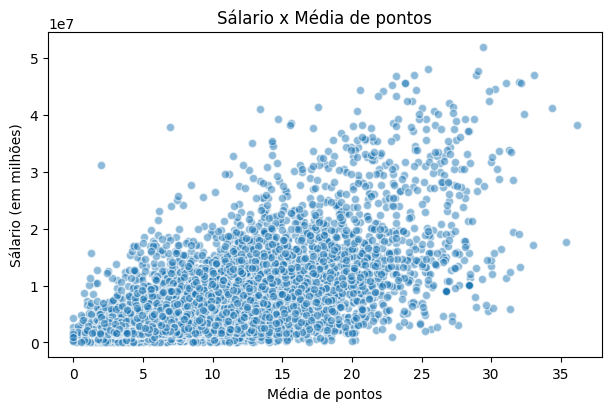

In [33]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.scatter(
    df_nba_stats['avgPoints'],
    df_nba_stats['salary'],
    edgecolors='w',
    alpha=.5
)
plt.title('Sálario x Média de pontos')
plt.xlabel('Média de pontos')
plt.ylabel('Sálario (em milhões)')
plt.show()

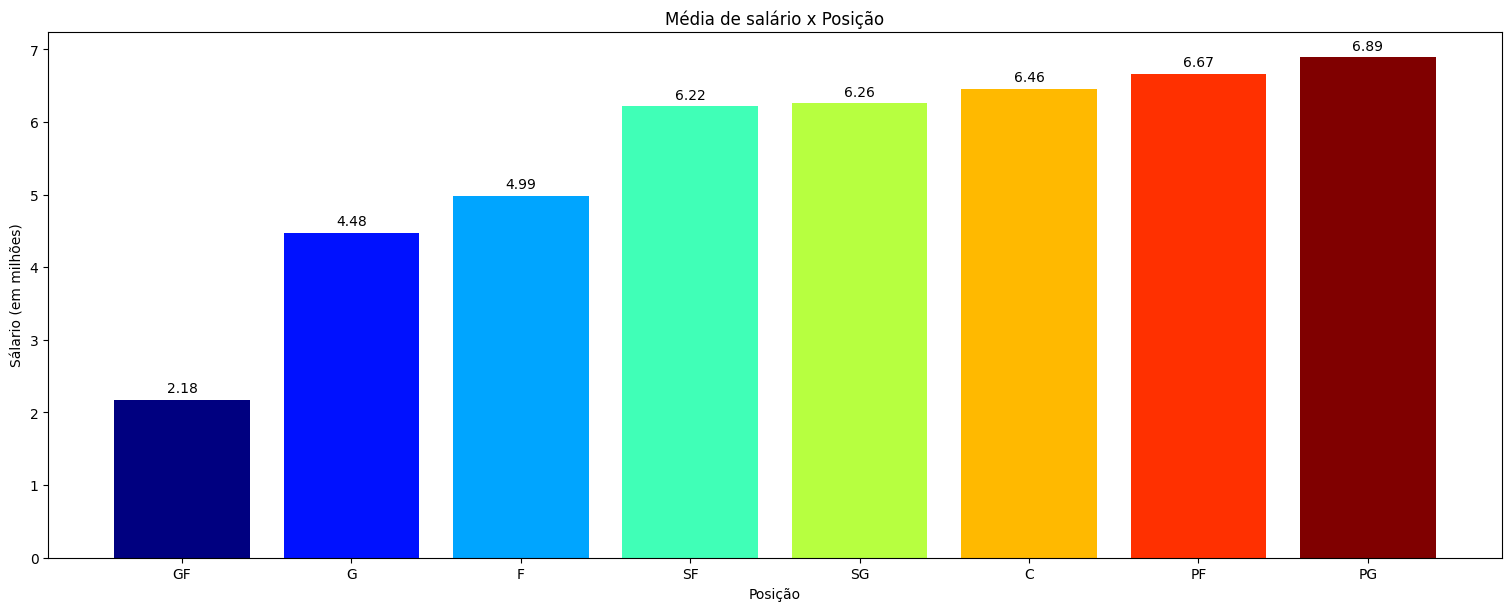

In [34]:
fig, ax = plt.subplots(figsize=(15, 6), layout='constrained')



nba_salary_by_position = df_nba_stats.groupby(

    'positionId')['salary'].mean().reset_index()


nba_salary_by_position_sorted = nba_salary_by_position.sort_values(

by='salary', ascending=True)


nba_salary_by_position_sorted['salary'] = nba_salary_by_position_sorted['salary'] / 1e6


n = len(nba_salary_by_position_sorted['salary'])
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, n)]

ax.bar(
    nba_salary_by_position_sorted['positionId'],
    nba_salary_by_position_sorted['salary'], color=colors
)

for i, j in zip(range(n), nba_salary_by_position_sorted['salary']):
    ax.text(i, j + 0.1, '{:.2f}'.format(j), ha='center')



plt.title('Média de salário x Posição')
plt.xlabel('Posição')
plt.ylabel('Sálario (em milhões)')
plt.show()

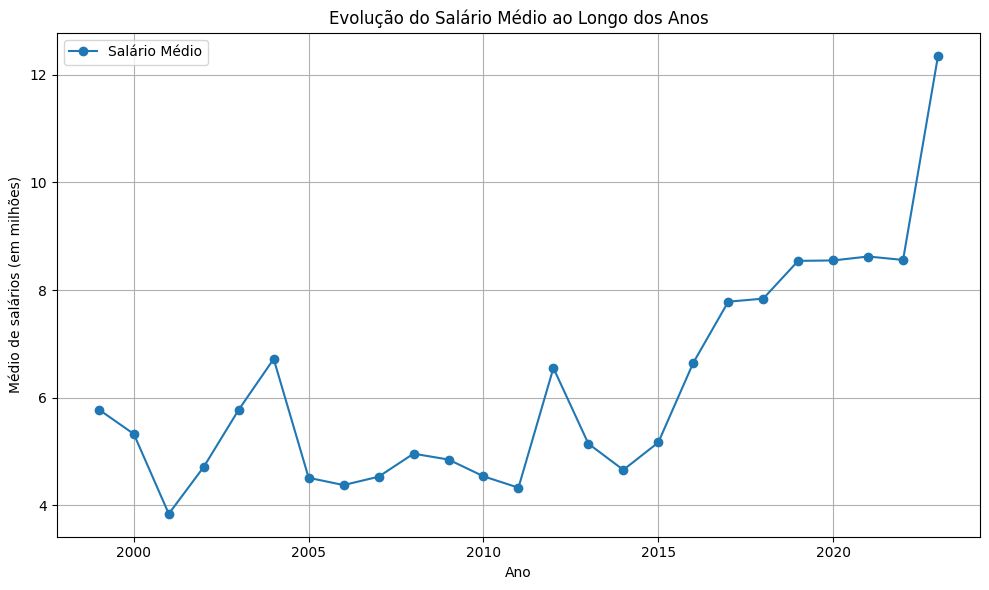

In [65]:
nba_grouped = df_nba_stats.groupby('year').agg({'salary': 'mean'}).reset_index()
nba_grouped['salary'] = nba_grouped['salary'] / 1e6

plt.figure(figsize=(10, 6))


plt.plot(nba_grouped['year'], nba_grouped['salary'], label='Salário Médio', marker='o')



plt.title('Evolução do Salário Médio ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Médio de salários (em milhões)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequência')

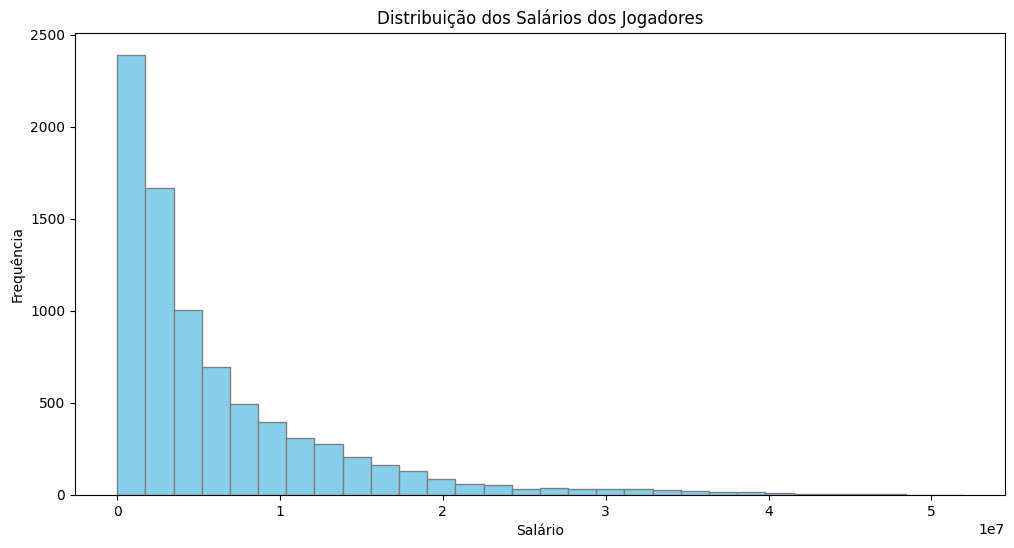

In [74]:
plt.figure(figsize=(12, 6))

plt.hist(df_nba_stats['salary'], bins=30, color='skyblue', edgecolor='gray')

plt.title('Distribuição dos Salários dos Jogadores')
plt.xlabel('Salário')
plt.ylabel('Frequência')